In [1]:
!pip install tensorflow opencv-python matplotlib

In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid Out of memory errors coz initially tensorflow expands and use lot of RAM so it is removed by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
image_exts[1]

'jpg'

In [10]:
os.listdir(data_dir)

['happy images', 'sad images']

In [11]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '10-Habits-of-Happy-People-Seniors-Today.jpg',
 '170404-happy-workers-feature.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1_617fd1e2590c2.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '35438_hd.jpg',
 '613k1XcpYCL._SL1200_.jpg',
 '71hBPTAhIXL.jpg',
 '7VR73K6EP5ETVEOUFANWBUYJEQ.jpg',
 '81Vk4C.jpg',
 '960x0.jpg',
 '988689_Wallpaper2.jpg',
 'AOLn63FB67T8ZgPMTj05Qa9LsnnvXAufbyvD8pkQonWt0ws64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'cess-group-positive-friends-celebrate-victory-achievement-together_1016-9922.jpg',
 'compassion-900x387.jpg',
 'Dollarphotoclub_76084977-1.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'file-20230208-27-3jttof.jpg',
 'friends-happy-190821.jpg',
 'friends_190412.jpg',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMp

In [13]:
#first we go into data directory then iterate through happy and sad folders, scan each image using opencv,if it is not according
#to the formats given in image_exts,then we'll remove it from the folder.
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [14]:
#tensorflow datset api allows you to build data pipeline so rather than loading everything into memory to begin with it actually
#allows you to build data pipeline which helps to work with large dataset gives you with repeatable steps,we'll not be using
#this api directly instead we'll use keras utility
tf.data.Dataset??

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [59]:
#this keras utility performs various functions
#basiacally building a data pipeline
data = tf.keras.utils.image_dataset_from_directory('data')

Found 170 files belonging to 2 classes.


In [60]:
#allowing us to access the data pipeline
data_iterator = data.as_numpy_iterator()

In [61]:
batch = data_iterator.next()

In [62]:
#this 2 length means 1 is for images and other is for labels.
len(batch)

2

In [63]:
#image represented as numpy arrays,batch[0] gives images
batch[0]

array([[[[255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         ...,
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ]],

        [[255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         ...,
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ]],

        [[255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         ...,
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ],
         [255.        , 255.        , 255.        ]],

In [65]:
#1 is for sad people 0 is for happy people, batch[1] gives labels
batch[1]

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0])

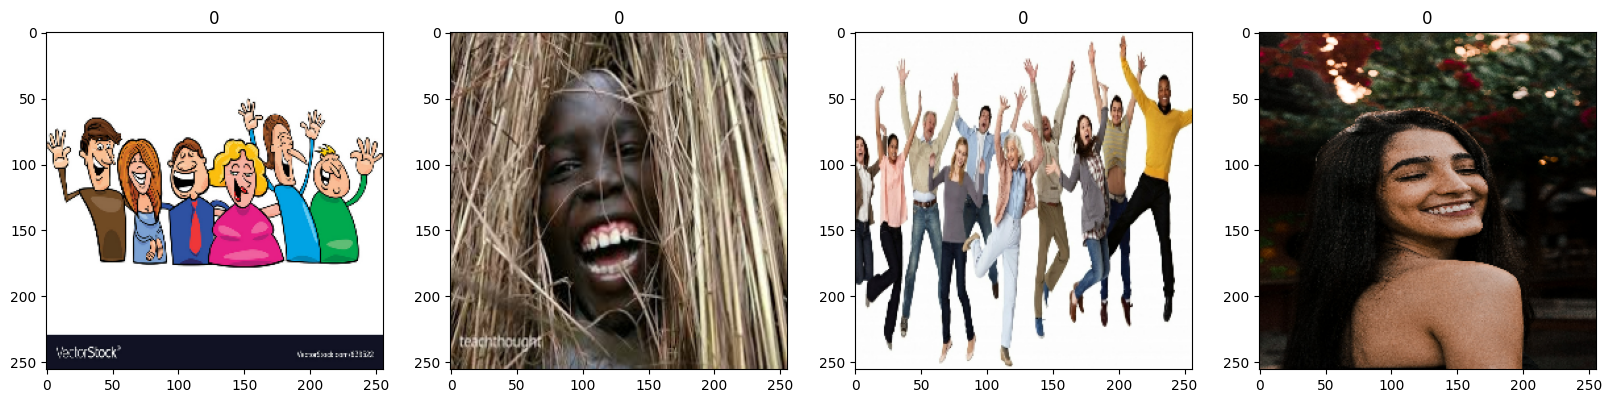

In [66]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [67]:
#intially our image lies from 0 to 255 pixels,so we need to minimize it to 0 to 1, we use data.map feature which scales the
#images in data pipeline
#x is images,y is labels
data = data.map(lambda x,y: (x/255, y))

In [68]:
#for shuffling the data
data.as_numpy_iterator().next()

(array([[[[0.04313726, 0.03529412, 0.08627451],
          [0.04313726, 0.03529412, 0.08627451],
          [0.04313726, 0.03529412, 0.07843138],
          ...,
          [0.04705882, 0.05490196, 0.11372549],
          [0.04820652, 0.05604966, 0.11487319],
          [0.03717281, 0.04501594, 0.10383947]],
 
         [[0.04313726, 0.03529412, 0.08627451],
          [0.04313726, 0.03529412, 0.08627451],
          [0.03921569, 0.03137255, 0.07450981],
          ...,
          [0.04957108, 0.05741422, 0.11623774],
          [0.04545575, 0.05329889, 0.11212242],
          [0.04098499, 0.04882812, 0.10765165]],
 
         [[0.04313726, 0.03529412, 0.08627451],
          [0.04313726, 0.03529412, 0.08627451],
          [0.03921569, 0.03137255, 0.07450981],
          ...,
          [0.05098039, 0.05882353, 0.11764706],
          [0.06267054, 0.07051367, 0.1293372 ],
          [0.06214612, 0.06998926, 0.12881278]],
 
         ...,
 
         [[0.03137255, 0.02352941, 0.06666667],
          [0.03137

In [69]:
len(data)

6

In [70]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [71]:
train_size

4

In [72]:
#take defines how much data we are going to take in a particular partition,as we are shuffling data again and again so same
#batch used in train should not be used in val or test,thats'y we skip those batches
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [74]:
model = Sequential()

In [75]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [76]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [48]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 14400)             0

In [77]:

logdir='logs'

In [78]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [79]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 9s 2s/step - loss: 0.7690 - accuracy: 0.6172 - val_loss: 0.6810 - val_accuracy: 0.6875
Epoch 2/20
4/4 [==============================] - 4s 767ms/step - loss: 0.6606 - accuracy: 0.6641 - val_loss: 0.6340 - val_accuracy: 0.5625
Epoch 3/20
4/4 [==============================] - 4s 718ms/step - loss: 0.5972 - accuracy: 0.6328 - val_loss: 0.5116 - val_accuracy: 0.7812
Epoch 4/20
4/4 [==============================] - 4s 720ms/step - loss: 0.5596 - accuracy: 0.6953 - val_loss: 0.5260 - val_accuracy: 0.8750
Epoch 5/20
4/4 [==============================] - 4s 718ms/step - loss: 0.4926 - accuracy: 0.7734 - val_loss: 0.4714 - val_accuracy: 0.6875
Epoch 6/20
4/4 [==============================] - 4s 744ms/step - loss: 0.4607 - accuracy: 0.7812 - val_loss: 0.2921 - val_accuracy: 0.9375
Epoch 7/20
4/4 [==============================] - 4s 731ms/step - loss: 0.5073 - accuracy: 0.7734 - val_loss: 0.3232 - val_accuracy: 0.9062
Epoch 8/20
4/4 [=======

In [80]:
hist.history

{'loss': [0.7689851522445679,
  0.660616397857666,
  0.5972236394882202,
  0.5595980882644653,
  0.49257975816726685,
  0.46066543459892273,
  0.5072571039199829,
  0.3643701672554016,
  0.345770925283432,
  0.24558193981647491,
  0.22994866967201233,
  0.19885051250457764,
  0.17261600494384766,
  0.11882355809211731,
  0.09640058875083923,
  0.06392688304185867,
  0.043408073484897614,
  0.022201862186193466,
  0.01819755882024765,
  0.010604970157146454],
 'accuracy': [0.6171875,
  0.6640625,
  0.6328125,
  0.6953125,
  0.7734375,
  0.78125,
  0.7734375,
  0.890625,
  0.875,
  0.9296875,
  0.890625,
  0.9296875,
  0.953125,
  0.9765625,
  0.96875,
  0.984375,
  0.9765625,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.6810097694396973,
  0.6339517831802368,
  0.5115744471549988,
  0.5260493755340576,
  0.4714477062225342,
  0.2921125292778015,
  0.32319802045822144,
  0.3564600944519043,
  0.4245777130126953,
  0.21692363917827606,
  0.20153002440929413,
  0.09353050589561462,
  0.1416548490

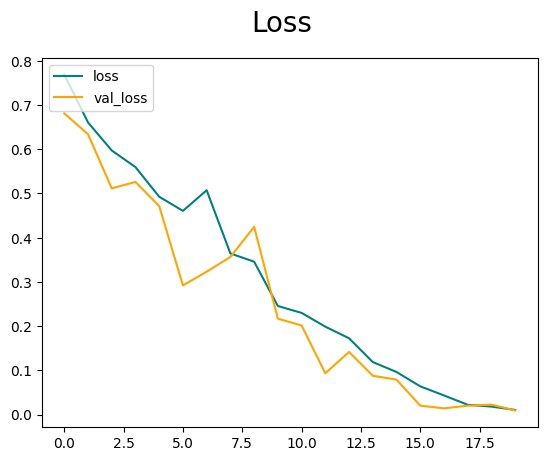

In [81]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

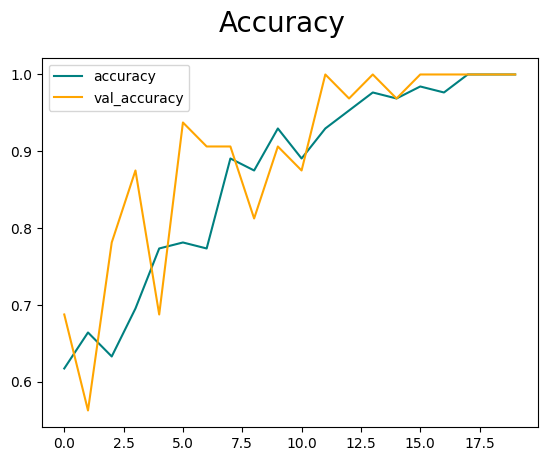

In [82]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [83]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [84]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [85]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [87]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


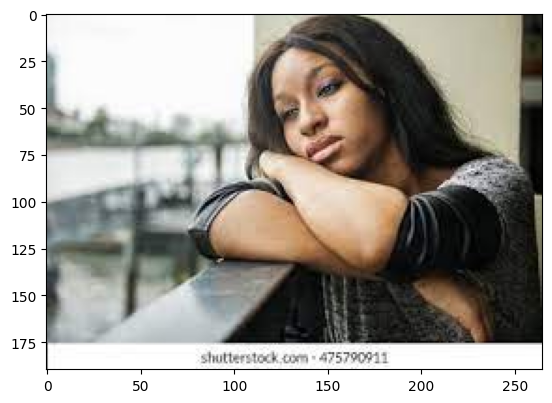

In [105]:
img = cv2.imread('sadtest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


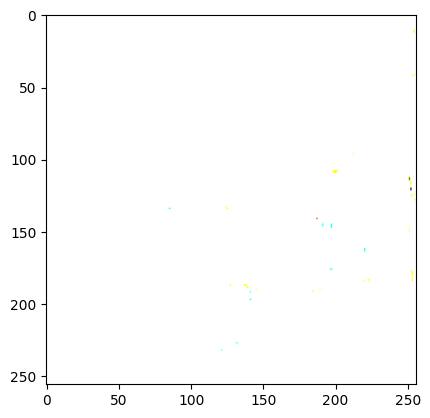

In [107]:
resize = tf.image.resize(img, (256,256))
plt.imshow(cv2.cvtColor(resize.numpy(),cv2.COLOR_BGR2RGB))
plt.show()

In [108]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [109]:
yhat

array([[0.84924346]], dtype=float32)

In [110]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [111]:
from tensorflow.keras.models import load_model


In [113]:
model.save(os.path.join('models','imageclassifier.h5'))


In [114]:
new_model = load_model('imageclassifier.h5')


OSError: SavedModel file does not exist at: imageclassifier.h5\{saved_model.pbtxt|saved_model.pb}